# Player Role Geometry using PCA
Real Data — Premier League 2024/25

In [1]:
import pandas as pd

In [2]:
shot_df = pd.read_csv("../data/Shots stats.csv")
standard_df = pd.read_csv("../data/Standard stats.csv")
possesion_df = pd.read_csv("../data/Possesion Stats.csv")
def_df = pd.read_csv("../data/Defensive Action.csv")

In [3]:
shot_df

,Player,Pos,Squad,Age,90s,Goals,Shots,Shots on Target,Avg Shot Distance,Free kick shots,PK shots,PK attempts,xG
0,Max Aarons,DF,Bournemouth,24.0,1.0,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00
1,Joshua Acheampong,DF,Chelsea,18.0,1.9,0.00,1.05,0.00,8.9,0.00,0.00,0.00,0.11
2,Tyler Adams,MF,Bournemouth,25.0,21.8,0.00,0.41,0.09,16.9,0.00,0.00,0.00,0.07
3,Tosin Adarabioyo,DF,Chelsea,26.0,15.7,0.06,0.83,0.13,12.5,0.00,0.00,0.00,0.06
4,Simon Adingra,"FW,MF",Brighton,22.0,12.2,0.16,2.70,0.66,17.0,0.00,0.00,0.00,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,Ashley Young,DF,Everton,39.0,20.8,0.05,0.29,0.14,24.5,0.14,0.00,0.00,0.01
570,Illia Zabarnyi,DF,Bournemouth,21.0,34.5,0.00,0.35,0.03,9.8,0.00,0.00,0.00,0.04
571,Oleksandr Zinchenko,"DF,MF",Arsenal,27.0,5.9,0.00,1.69,0.00,19.6,0.17,0.00,0.00,0.10
572,Joshua Zirkzee,"FW,MF",Manchester Utd,23.0,15.6,0.19,1.79,0.71,13.1,0.00,0.00,0.00,0.31


In [4]:
def_df.describe()

,Age,Tackles,Tackles in Def 3rd,Tackles in Mid 3rd,Tackles in Att 3rd,Blocks,Interceptions
count,573.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000
mean,25.047120,1.832439,0.861463,0.696847,0.274355,1.014652,0.726655
std,4.494699,2.129002,1.493993,1.115898,0.563808,0.999100,0.879292
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.890000,0.182500,0.210000,0.000000,0.490000,0.162500
50%,25.000000,1.530000,0.630000,0.560000,0.180000,0.960000,0.580000
75%,28.000000,2.417500,1.130000,0.920000,0.350000,1.330000,1.030000
max,39.000000,30.000000,20.000000,20.000000,10.000000,10.000000,10.000000


In [5]:
standard_df

,Player,Pos,Squad,Age,Min,Gls,Ast,Progressive Carries,Progressive Passes,Progressive Passes Recieved
0,Max Aarons,DF,Bournemouth,24.0,86,0.00,0.00,1.00,8.00,3.00
1,Joshua Acheampong,DF,Chelsea,18.0,170,0.00,0.00,0.00,4.21,0.00
2,Tyler Adams,MF,Bournemouth,25.0,"1,965",0.00,0.14,0.64,3.49,0.46
3,Tosin Adarabioyo,DF,Chelsea,26.0,"1,409",0.06,0.06,0.32,2.68,0.06
4,Simon Adingra,"FW,MF",Brighton,22.0,"1,097",0.16,0.16,4.10,1.48,11.10
...,...,...,...,...,...,...,...,...,...,...
569,Ashley Young,DF,Everton,39.0,"1,875",0.05,0.14,1.15,4.33,1.54
570,Illia Zabarnyi,DF,Bournemouth,21.0,"3,109",0.00,0.03,0.78,4.06,0.12
571,Oleksandr Zinchenko,"DF,MF",Arsenal,27.0,527,0.00,0.17,1.69,8.14,2.37
572,Joshua Zirkzee,"FW,MF",Manchester Utd,23.0,"1,402",0.19,0.06,0.90,2.82,4.42


In [6]:
possesion_df

,Player,Pos,Squad,Age,Touches,Touches in Def Pen,Touches in Def 1/3,Touches in Mid 1/3,Touches in Att 1/3,Att Pen,Live ball touches
0,Max Aarons,DF,Bournemouth,24.0,73.0,2.00,19.00,40.0,15.00,0.00,73.0
1,Joshua Acheampong,DF,Chelsea,18.0,72.1,3.68,25.30,42.6,4.21,1.58,72.1
2,Tyler Adams,MF,Bournemouth,25.0,61.3,2.84,16.00,35.7,10.30,0.83,61.3
3,Tosin Adarabioyo,DF,Chelsea,26.0,84.7,11.10,40.10,42.9,1.72,0.89,84.7
4,Simon Adingra,"FW,MF",Brighton,22.0,44.9,0.82,5.41,14.3,25.80,6.23,44.9
...,...,...,...,...,...,...,...,...,...,...,...
569,Ashley Young,DF,Everton,39.0,57.4,2.93,17.70,25.4,14.70,0.43,57.4
570,Illia Zabarnyi,DF,Bournemouth,21.0,59.8,6.78,26.90,31.2,2.23,0.46,59.8
571,Oleksandr Zinchenko,"DF,MF",Arsenal,27.0,84.6,2.71,14.60,39.5,30.70,3.39,84.6
572,Joshua Zirkzee,"FW,MF",Manchester Utd,23.0,37.6,1.03,4.55,19.4,14.00,3.59,37.6


In [7]:
standard_df["Min"].head()
standard_df["Min"].dtype

dtype('O')

In [8]:
standard_df["Min"] = (
    standard_df["Min"]
    .str.replace(",", "", regex=False)
    .astype(int)
)

In [9]:
standard_df['Min'].dtype

dtype('int64')

In [10]:
standard = standard_df[standard_df["Min"] >= 300]
standard = standard.reset_index(drop=True)

In [11]:
standard

,Player,Pos,Squad,Age,Min,Gls,Ast,Progressive Carries,Progressive Passes,Progressive Passes Recieved
0,Tyler Adams,MF,Bournemouth,25.0,1965,0.00,0.14,0.64,3.49,0.46
1,Tosin Adarabioyo,DF,Chelsea,26.0,1409,0.06,0.06,0.32,2.68,0.06
2,Simon Adingra,"FW,MF",Brighton,22.0,1097,0.16,0.16,4.10,1.48,11.10
3,Emmanuel Agbadou,DF,Wolves,27.0,1410,0.06,0.00,0.38,1.97,0.13
4,Ola Aina,DF,Nottingham Forest,27.0,2995,0.06,0.03,2.01,3.21,2.01
...,...,...,...,...,...,...,...,...,...,...
432,Ashley Young,DF,Everton,39.0,1875,0.05,0.14,1.15,4.33,1.54
433,Illia Zabarnyi,DF,Bournemouth,21.0,3109,0.00,0.03,0.78,4.06,0.12
434,Oleksandr Zinchenko,"DF,MF",Arsenal,27.0,527,0.00,0.17,1.69,8.14,2.37
435,Joshua Zirkzee,"FW,MF",Manchester Utd,23.0,1402,0.19,0.06,0.90,2.82,4.42


In [12]:
standard["Min"].describe()

count     437.000000
mean     1688.297483
std       922.034395
min       303.000000
25%       860.000000
50%      1655.000000
75%      2482.000000
max      3420.000000
Name: Min, dtype: float64

In [13]:
standard = standard.rename(columns={
    "Player": "player",
    "Squad": "team",
    "Min": "minutes",
})

In [14]:
possession = possesion_df.rename(columns={
    "Player": "player",
    "Touches": "touches",
    "Touches in Def Pen": "touches_def_pen",
    "Touches in Def 1/3": "touches_def_3rd",
    "Touches in Mid 1/3": "touches_mid_3rd",
    "Touches in Att 1/3": "touches_att_3rd",
    "Att Pen": "touches_att_pen"
})


In [15]:
defense = def_df.rename(columns={
    "Player": "player",
    "Tackles": "tackles",
    "Interceptions": "interceptions"
})


In [16]:
shot = shot_df.rename(columns={
    "Player": "player",
    "Shots": "shots",
    "xG": "xg"
})

In [17]:
df = (
    standard[["player", "team", "minutes"]]
    .merge(
        possession[[
            "player",
            "touches",
            "touches_def_pen",
            "touches_def_3rd",
            "touches_mid_3rd",
            "touches_att_3rd",
            "touches_att_pen"
        ]],
        on="player",
        how="inner"
    )
    .merge(
        defense[["player", "tackles", "interceptions"]],
        on="player",
        how="inner"
    )
    .merge(
        shot[['player', 'shots', 'xg']],
        on="player",
        how="inner"
    )
)


In [18]:
df.shape

(542, 13)

In [19]:
df.isna().sum()

player             0
team               0
minutes            0
touches            0
touches_def_pen    0
touches_def_3rd    0
touches_mid_3rd    0
touches_att_3rd    0
touches_att_pen    0
tackles            0
interceptions      0
shots              0
xg                 0
dtype: int64

In [20]:
df.head()

,player,team,minutes,touches,touches_def_pen,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen,tackles,interceptions,shots,xg
0,Tyler Adams,Bournemouth,1965,61.3,2.84,16.00,35.7,10.30,0.83,3.81,1.47,0.41,0.07
1,Tosin Adarabioyo,Chelsea,1409,84.7,11.10,40.10,42.9,1.72,0.89,1.08,0.70,0.83,0.06
2,Simon Adingra,Brighton,1097,44.9,0.82,5.41,14.3,25.80,6.23,1.89,0.66,2.70,0.20
3,Emmanuel Agbadou,Wolves,1410,74.6,12.10,41.30,32.1,1.78,0.45,1.91,0.76,0.45,0.05
4,Ola Aina,Nottingham Forest,2995,51.3,4.68,18.40,21.5,12.30,0.66,1.65,0.99,0.33,0.02


In [21]:
df["touches_def_3rd_pct"] = df["touches_def_3rd"] / df["touches"]
df["touches_mid_3rd_pct"] = df["touches_mid_3rd"] / df["touches"]
df["touches_att_3rd_pct"] = df["touches_att_3rd"] / df["touches"]
df["touches_att_pen_pct"] = df["touches_att_pen"] / df["touches"]

In [22]:
df.head()

,player,team,minutes,touches,touches_def_pen,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen,tackles,interceptions,shots,xg,touches_def_3rd_pct,touches_mid_3rd_pct,touches_att_3rd_pct,touches_att_pen_pct
0,Tyler Adams,Bournemouth,1965,61.3,2.84,16.00,35.7,10.30,0.83,3.81,1.47,0.41,0.07,0.261011,0.582382,0.168026,0.013540
1,Tosin Adarabioyo,Chelsea,1409,84.7,11.10,40.10,42.9,1.72,0.89,1.08,0.70,0.83,0.06,0.473436,0.506494,0.020307,0.010508
2,Simon Adingra,Brighton,1097,44.9,0.82,5.41,14.3,25.80,6.23,1.89,0.66,2.70,0.20,0.120490,0.318486,0.574610,0.138753
3,Emmanuel Agbadou,Wolves,1410,74.6,12.10,41.30,32.1,1.78,0.45,1.91,0.76,0.45,0.05,0.553619,0.430295,0.023861,0.006032
4,Ola Aina,Nottingham Forest,2995,51.3,4.68,18.40,21.5,12.30,0.66,1.65,0.99,0.33,0.02,0.358674,0.419103,0.239766,0.012865


In [23]:
df[[
    "touches_def_3rd_pct",
    "touches_mid_3rd_pct",
    "touches_att_3rd_pct"
]].describe()


,touches_def_3rd_pct,touches_mid_3rd_pct,touches_att_3rd_pct
count,542.000000,542.000000,542.000000
mean,0.305837,0.420450,0.284927
std,0.227807,0.134624,0.199155
min,0.000000,0.000000,0.000000
25%,0.138881,0.371053,0.086753
50%,0.241640,0.444558,0.268161
75%,0.408602,0.510476,0.454082
max,1.000000,0.646209,0.763052


In [24]:
features = [
    # Spatial role
    "touches_def_3rd_pct",
    "touches_mid_3rd_pct",
    "touches_att_3rd_pct",
    "touches_att_pen_pct",

    # Activity & intensity
    "touches",
    "tackles",
    "interceptions",

    # Threat
    "shots",
    "xg"
]

In [25]:
X = df[features].dropna()

In [26]:
X

,touches_def_3rd_pct,touches_mid_3rd_pct,touches_att_3rd_pct,touches_att_pen_pct,touches,tackles,interceptions,shots,xg
0,0.261011,0.582382,0.168026,0.013540,61.3,3.81,1.47,0.41,0.07
1,0.473436,0.506494,0.020307,0.010508,84.7,1.08,0.70,0.83,0.06
2,0.120490,0.318486,0.574610,0.138753,44.9,1.89,0.66,2.70,0.20
3,0.553619,0.430295,0.023861,0.006032,74.6,1.91,0.76,0.45,0.05
4,0.358674,0.419103,0.239766,0.012865,51.3,1.65,0.99,0.33,0.02
...,...,...,...,...,...,...,...,...,...
537,0.308362,0.442509,0.256098,0.007491,57.4,2.79,1.20,0.29,0.01
538,0.449833,0.521739,0.037291,0.007692,59.8,1.51,1.19,0.35,0.04
539,0.172577,0.466903,0.362884,0.040071,84.6,1.02,0.85,1.69,0.10
540,0.121011,0.515957,0.372340,0.095479,37.6,0.90,0.38,1.79,0.31


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
X_scaled

array([[-0.19695   ,  1.20395563, -0.58752558, ...,  0.72074522,
        -0.69954364, -0.34901255],
       [ 0.73638479,  0.63973153, -1.32994   , ..., -0.09539275,
        -0.39005533, -0.38671731],
       [-0.81436331, -0.75809584,  1.4559059 , ..., -0.13778953,
         0.98790452,  0.14114938],
       ...,
       [-0.58550772,  0.34537918,  0.39180207, ...,  0.06359517,
         0.24365882, -0.23589826],
       [-0.81207567,  0.71009532,  0.43932785, ..., -0.43456697,
         0.31734652,  0.55590179],
       [-1.0174106 , -0.02529618,  1.16124773, ..., -0.59355489,
         0.3689279 ,  0.10344462]], shape=(542, 9))

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [30]:
pca.explained_variance_ratio_

array([0.39773678, 0.23596209])

In [31]:
pca_df = pd.DataFrame(
    X_pca,
    columns=["PC1", "PC2"]
)

pca_df["player"] = df.loc[X.index, "player"].values
pca_df["team"] = df.loc[X.index, "team"].values

In [32]:
pca_df

,PC1,PC2,player,team
0,-0.958123,2.250505,Tyler Adams,Bournemouth
1,-1.847882,0.726339,Tosin Adarabioyo,Chelsea
2,2.382619,-0.691854,Simon Adingra,Brighton
3,-2.098728,0.446554,Emmanuel Agbadou,Wolves
4,-1.059436,0.003552,Ola Aina,Nottingham Forest
...,...,...,...,...
537,-1.030212,0.923646,Ashley Young,Everton
538,-1.779500,0.608698,Illia Zabarnyi,Bournemouth
539,0.132070,0.848003,Oleksandr Zinchenko,Arsenal
540,1.480899,-0.421223,Joshua Zirkzee,Manchester Utd


In [33]:
pd.DataFrame(
    pca.components_.T,
    index=features,
    columns=["PC1", "PC2"]
)

,PC1,PC2
touches_def_3rd_pct,-0.431401,-0.299579
touches_mid_3rd_pct,0.038427,0.577542
touches_att_3rd_pct,0.480733,-0.041952
touches_att_pen_pct,0.465476,-0.174089
touches,-0.151394,0.455082
tackles,0.015673,0.428272
interceptions,-0.033098,0.389247
shots,0.440731,0.050567
xg,0.382283,0.006673


In [34]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

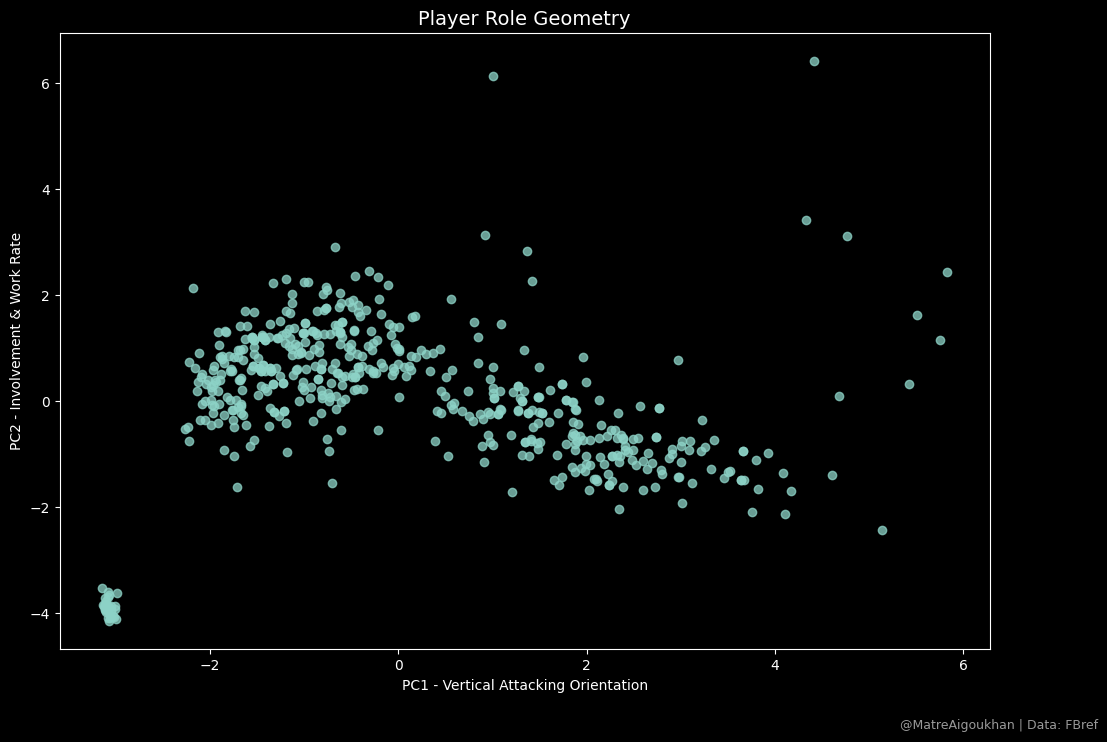

In [35]:
plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.75)

ax.set_title("Player Role Geometry", fontsize=14)
plt.xlabel("PC1 - Vertical Attacking Orientation")
plt.ylabel("PC2 - Involvement & Work Rate")

fig.text(
    0.99, 0.01,
    "@MatreAigoukhan | Data: FBref",
    ha="right",
    fontsize=9,
    alpha=0.6
)
plt.savefig("../visuals/pc1_vs_pc2", dpi=300, bbox_inches="tight")
plt.show()


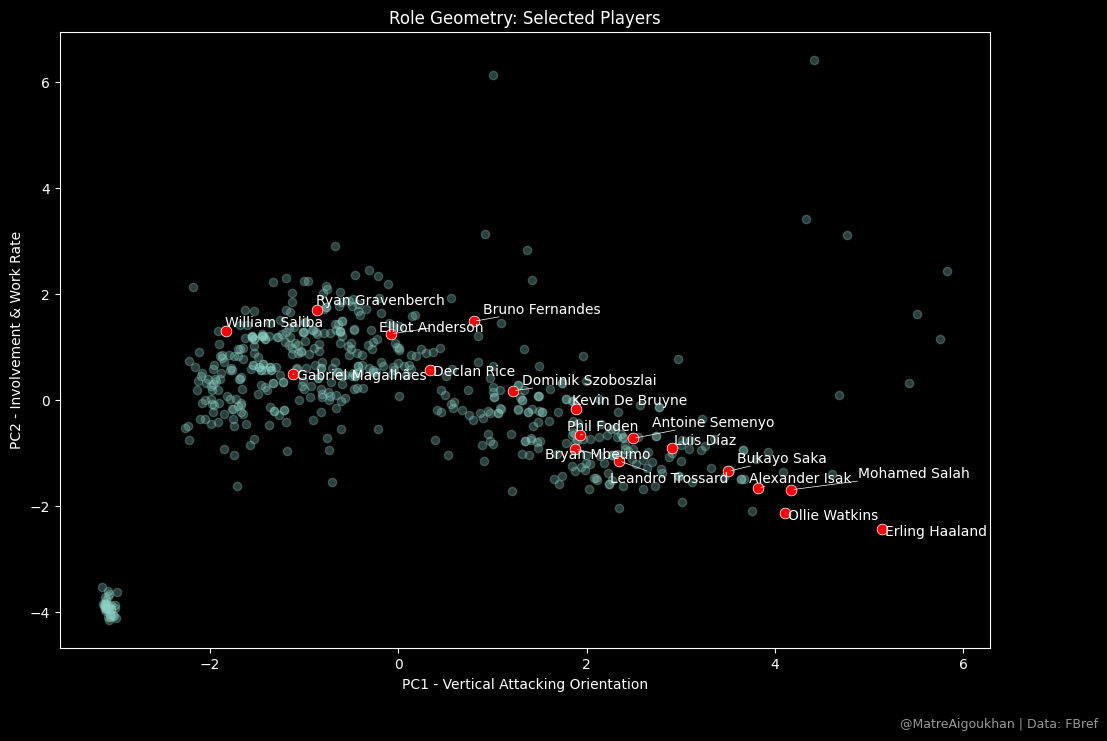

In [44]:
highlight = [
    "Erling Haaland", "Kevin De Bruyne", "Bukayo Saka", "Leandro Trossard", "Bryan Mbeumo", "Ryan Gravenberch",
    "William Saliba", "Ollie Watkins","Alexander Isak", "Luis Díaz", "Kevin De Bruyne", "Phil Foden", "Dominik Szoboszlai",
    "Mohamed Salah", "Gabriel Magalhães", "Bruno Fernandes","Antoine Semenyo", "Declan Rice", "Elliot Anderson"
]

subset = pca_df[pca_df["player"].isin(highlight)]

plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter( 
    pca_df["PC1"], pca_df["PC2"],
    alpha=0.3
)

ax.scatter(
    subset["PC1"], subset["PC2"],
    c="red", s=60, edgecolors="white", linewidths=0.5
)

texts = []
for _, row in subset.iterrows():
    texts.append(
        ax.text(row["PC1"], row["PC2"], row["player"], fontsize=10)
    )

adjust_text(
    texts,
    only_move={'points':'y', 'texts':'y'},  # move vertically only to reduce collisions
    arrowprops=dict(arrowstyle="-", color='white', lw=0.5)  # optional arrows pointing to points
)

ax.set_xlabel("PC1 - Vertical Attacking Orientation")
ax.set_ylabel("PC2 - Involvement & Work Rate")
ax.set_title("Role Geometry: Selected Players")

fig.text(
    0.99, 0.01,
    "@MatreAigoukhan | Data: FBref",
    ha="right",
    fontsize=9,
    alpha=0.6
)

plt.savefig("../visuals/role_geometry_selected_players.png", dpi=300, bbox_inches="tight")
plt.show()



In [45]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(pca_df[["PC1", "PC2"]])
similarity_df = pd.DataFrame(
    similarity_matrix,
    index=pca_df["player"],
    columns=pca_df["player"]
)

In [46]:
def most_similar_players(player_name, top_n=5):
    sims = similarity_df[player_name].sort_values(ascending=False)
    return sims.iloc[1:top_n+1]

In [49]:
most_similar_players("Declan Rice", top_n=10)

player
Jordan Ayew           0.999696
Bruno Fernandes       0.999153
Carlos Alcaraz        0.997687
Facundo Buonanotte    0.997122
Carlos Alcaraz        0.996255
Curtis Jones          0.993996
Jordan Ayew           0.993959
Enzo Fernández        0.987961
Justin Devenny        0.975806
Joelinton             0.971261
Name: Declan Rice, dtype: float64

In [50]:
most_similar_players("Erling Haaland", top_n=10)

player
Andreas Pereira          0.999999
Harvey Barnes            0.999992
Jean-Philippe Mateta     0.999991
Rodrigo Gomes            0.999988
Dominic Calvert-Lewin    0.999987
Raheem Sterling          0.999975
Kai Havertz              0.999950
Leandro Trossard         0.999943
Bryan Mbeumo             0.999932
Julio Enciso             0.999909
Name: Erling Haaland, dtype: float64

In [51]:
most_similar_players("Bukayo Saka", top_n=10)

player
Beto              1.000000
Dwight McNeil     0.999998
Dango Ouattara    0.999998
Omar Marmoush     0.999990
Noni Madueke      0.999981
Sávio             0.999968
Anthony Gordon    0.999965
Kasey McAteer     0.999960
Jarrod Bowen      0.999957
Danny Welbeck     0.999941
Name: Bukayo Saka, dtype: float64

In [52]:
most_similar_players("Ollie Watkins", top_n=10)

player
Niclas Füllkrug          1.000000
Crysencio Summerville    0.999988
Wilson Odobert           0.999970
Jacob Murphy             0.999941
Morgan Rogers            0.999934
Julio Enciso             0.999893
Son Heung-min            0.999834
Yoane Wissa              0.999784
Abdoulaye Doucouré       0.999783
Dominic Solanke          0.999763
Name: Ollie Watkins, dtype: float64